In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

# Загрузка датасета


In [4]:
!pip install datatable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 7.3 MB/s eta 0:00:00


In [5]:
!pip install pyunpack patool

import os , sys
from pyunpack.cli import Archive

os.system('apt-get install p7zip')
print(os.getcwd())
import datatable as dt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.0 MB/s eta 0:00:00
/content


In [6]:


directory = ''
Archive('train.csv.7z').extractall(directory)
Archive('test.csv.7z').extractall(directory)
#Archive('songs.csv.7z').extractall(directory)
#Archive('members.csv.7z').extractall(directory)
#Archive('song_extra_info.csv.7z').extractall(directory)

train_df = reduce_mem_usage(dt.fread('./train.csv').to_pandas())
test_df = reduce_mem_usage(dt.fread('./test.csv').to_pandas())
songs_df = reduce_mem_usage(dt.fread('./songs.csv').to_pandas()) #'composer', 'lyricist'
members_df = reduce_mem_usage(dt.fread('./members.csv').to_pandas())

Memory usage of dataframe is 288.46 MB
Memory usage after optimization is: 89.45 MB
Decreased by 69.0%
Memory usage of dataframe is 107.29 MB
Memory usage after optimization is: 42.17 MB
Decreased by 60.7%
Memory usage of dataframe is 113.88 MB
Memory usage after optimization is: 159.83 MB
Decreased by -40.4%
Memory usage of dataframe is 1.18 MB
Memory usage after optimization is: 1.83 MB
Decreased by -54.8%


In [7]:
print(train_df.shape, test_df.shape, songs_df.shape, members_df.shape)

(7377418, 6) (2556790, 6) (2296320, 7) (34403, 7)


In [8]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


Проверяем dataframe на наличие пропусков.

In [9]:
train_df.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [10]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


# Feautere eng-ring

Проверяем dataframe на наличие пропусков.

In [11]:
songs_df.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       1
dtype: int64

In [12]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,,,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


Выедем количество уникальных жанров.

In [13]:
songs_df.genre_ids.value_counts()

465         567911
958         176349
2022        168870
1609        166457
2122        139938
             ...  
465|1007         1
1138|430         1
458|698          1
1208|139         1
423|531          1
Name: genre_ids, Length: 1046, dtype: int64

Разделим названия жанров по "|"

In [14]:
len(songs_df)

2296320

In [15]:
df_idx = songs_df["genre_ids"].str.split('|')

In [16]:
df_idx

0           [465]
1           [444]
2           [465]
3           [465]
4           [726]
            ...  
2296315     [958]
2296316     [465]
2296317    [1609]
2296318     [465]
2296319     [829]
Name: genre_ids, Length: 2296320, dtype: object

In [17]:


songs_df = pd.concat([songs_df.drop('genre_ids', axis = 1 ), df_idx.apply(pd.Series)], axis=1)



In [18]:
songs_df[songs_df['composer'].str.startswith('Korean')].language.value_counts()

31.0    125
3.0      27
52.0      2
Name: language, dtype: int64

In [19]:
songs_df.loc[songs_df['language'].isnull(),'language'] = 31.0

In [20]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,,4,20170126,20170613


In [21]:
members_df['registration_init_time'] = pd.to_datetime(members_df['registration_init_time'], format='%Y%m%d')
members_df['reg_year'] = members_df['registration_init_time'].dt.year
members_df['reg_month'] = members_df['registration_init_time'].dt.month
members_df['reg_day'] = members_df['registration_init_time'].dt.day

# expiration_date
members_df['expiration_date'] = pd.to_datetime(members_df['expiration_date'],  format='%Y%m%d')
members_df['exp_year'] = members_df['expiration_date'].dt.year
members_df['exp_month'] = members_df['expiration_date'].dt.month
members_df['exp_day'] = members_df['expiration_date'].dt.day

This code snippet removes the specified columns ('registration_init_time' and 'expiration_date') from the 'members_df' DataFrame.

In [22]:
members_df.drop(['registration_init_time','expiration_date'] , axis = 1 , inplace= True)

In [23]:
members_df.head()

,msno,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,,7,2011,8,20,2017,9,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,,7,2015,6,28,2017,6,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,,4,2016,4,11,2017,7,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,,9,2015,9,6,2015,9,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,,4,2017,1,26,2017,6,13


In [24]:
members_df['bd'] = members_df['bd'].apply(lambda x : 0 if x > 100 else abs(x) )

In [25]:
members_df['gender'] = members_df['gender'].astype("category").cat.codes

In [26]:
train_age = members_df[members_df['bd'] != 0].copy()
y_train_age  = train_age['bd']
train_age.drop(['msno' ,'bd','gender'],axis = 1 , inplace = True )
test_age =  members_df[members_df['bd'] == 0].copy()
y_test_age  = test_age['bd']
test_age.drop(['msno' ,'bd','gender'],axis = 1 , inplace = True )

In [27]:
train_age.head()

,city,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
5,13,9,2012,7,3,2017,10,6
10,12,9,2006,5,31,2017,8,16
13,15,3,2015,9,15,2017,10,19
15,13,3,2014,4,10,2017,4,27
16,13,9,2007,3,30,2017,6,12


In [28]:
len(train_age)

14449

# Попробуем восстановить пропуски в колонке bd с помощью catboost

In [29]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.9 MB/s eta 0:00:00


In [30]:
from lightgbm import LGBMClassifier , LGBMRegressor
from catboost import CatBoostClassifier ,CatBoostRegressor

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [31]:
model = CatBoostRegressor(verbose = 0)
model.fit(train_age.values, y_train_age.values.ravel())
cv_score = np.sqrt(- cross_val_score(model, train_age.values,y_train_age.values.ravel(), cv=3 ,scoring='neg_mean_squared_error').mean())
cv_score

8.873272710866614

In [32]:
preds_age = model.predict(test_age.values)
preds_age = preds_age.round()
preds_age

array([38., 25., 24., ..., 28., 28., 27.])

In [33]:
len(preds_age)

19954

In [34]:
members_df['bd'].value_counts()

0     19954
22      751
27      750
24      740
26      719
      ...  
90        1
2         1
70        1
3         1
10        1
Name: bd, Length: 80, dtype: int64

# EDA

Число уникальных песен и проверка на дисбаланс классов

In [35]:
print(train_df.target.value_counts()*100/train_df.target.value_counts().sum())
print('unique songs ',len(train_df.song_id.unique()))

1.0    50.351708
0.0    49.648292
Name: target, dtype: float64
unique songs  359966


Число и медианная длина песен на повторе

In [36]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=train_df[train_df.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']

In [37]:
song_repeats=pd.DataFrame(song_repeats).merge(songs_df,left_on='song_id',right_on='song_id')
print('median length of songs repeated',song_repeats.sort_values(by='count',ascending=False)[:2000].song_length.median())
print('median length of songs repeated',songs_df.song_length.median())

median length of songs repeated 246491.0
median length of songs repeated 226627.0


In [38]:
print("Top 20 songs repeated")
repeats.song_id.value_counts()[:20]

Top 20 songs repeated


reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWsvFLeopkS

Самые популярные языки и разделы

Text(0.5, 0, 'Language')

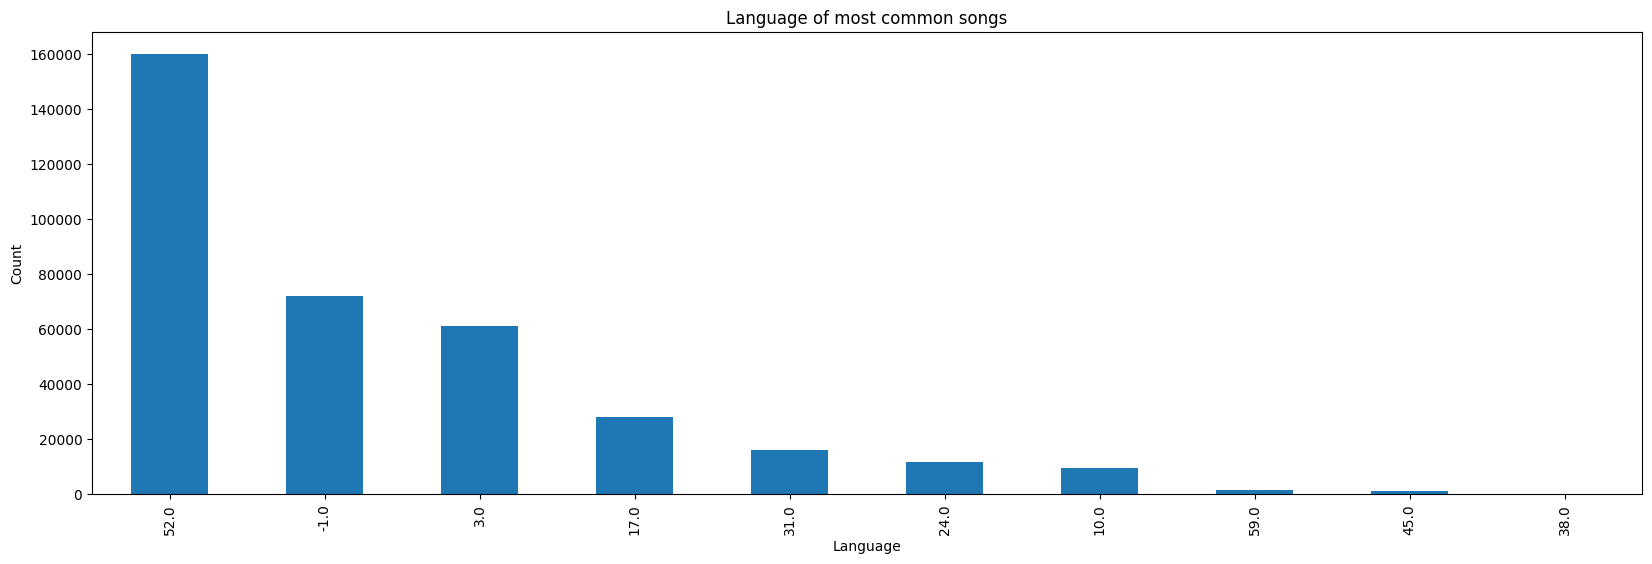

In [39]:
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of most common songs')
plt.ylabel('Count')
plt.xlabel('Language')

Text(0, 0.5, 'count')

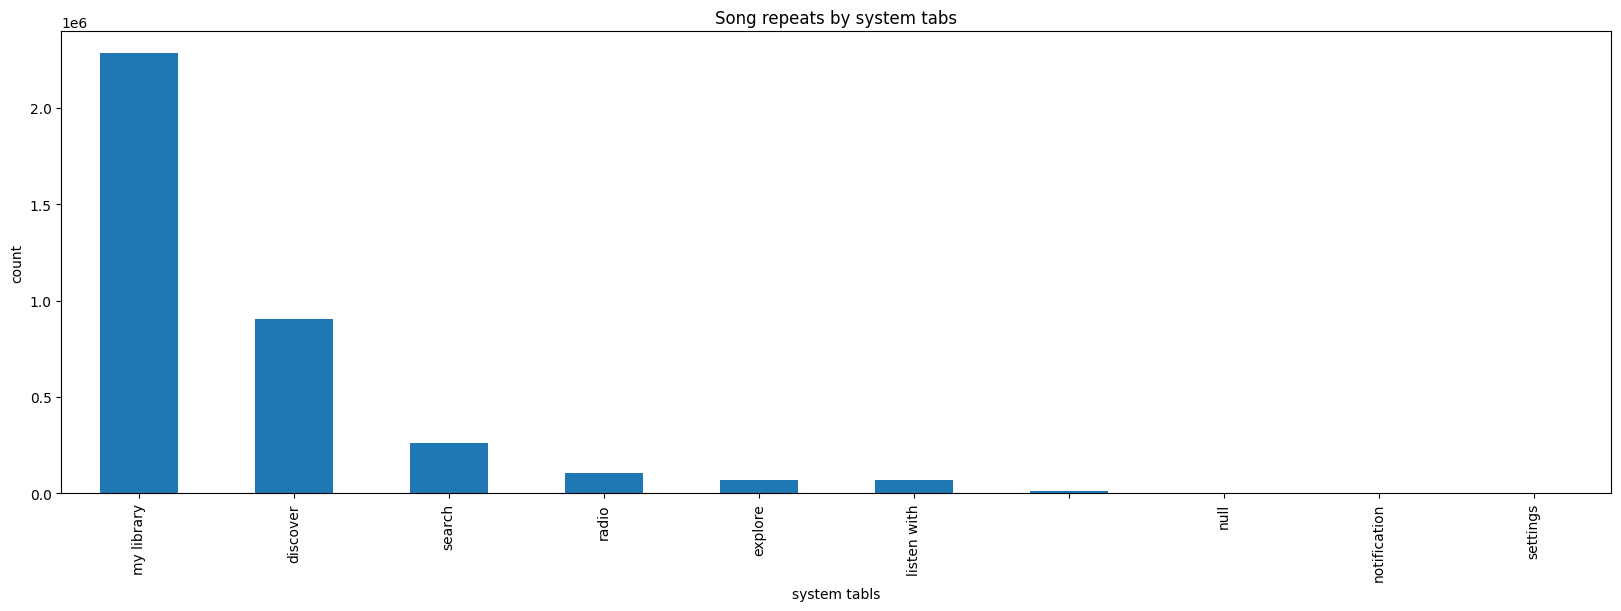

In [40]:
repeats.source_system_tab.value_counts().plot(kind='bar')

plt.title('Song repeats by system tabs')
plt.xlabel('system tabls')
plt.ylabel('count')

Заменим пропущенные значения дней рождения на пердсказанные ранее

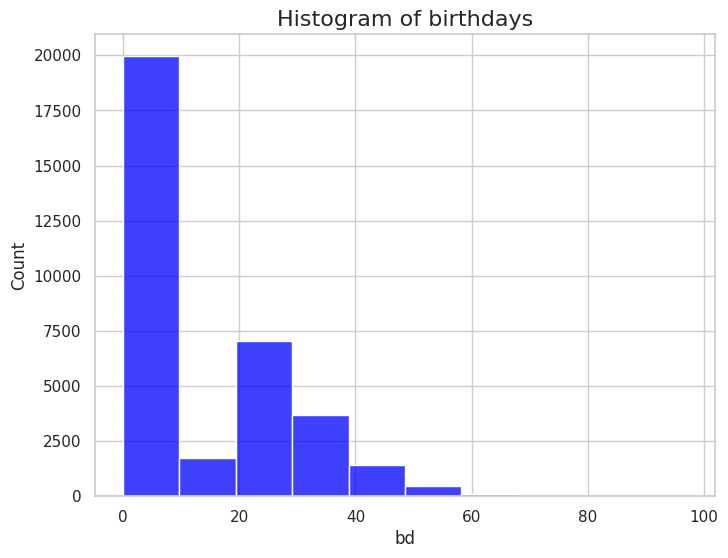

In [41]:

import seaborn as sns


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(x='bd', data=members_df, bins=10, color='blue', ax=ax)


ax.set_title('Histogram of birthdays', fontsize=16)

plt.show()


In [42]:
age_nulls_indexes = members_df[members_df['bd'] == 0].index
j = 0
for i in age_nulls_indexes :
    members_df.loc[i , 'bd'] = preds_age[j]
    j += 1

In [43]:
members_df['bd'].value_counts()

26    3537
27    3410
28    2884
25    2813
29    2671
      ... 
90       1
76       1
2        1
97       1
10       1
Name: bd, Length: 79, dtype: int64

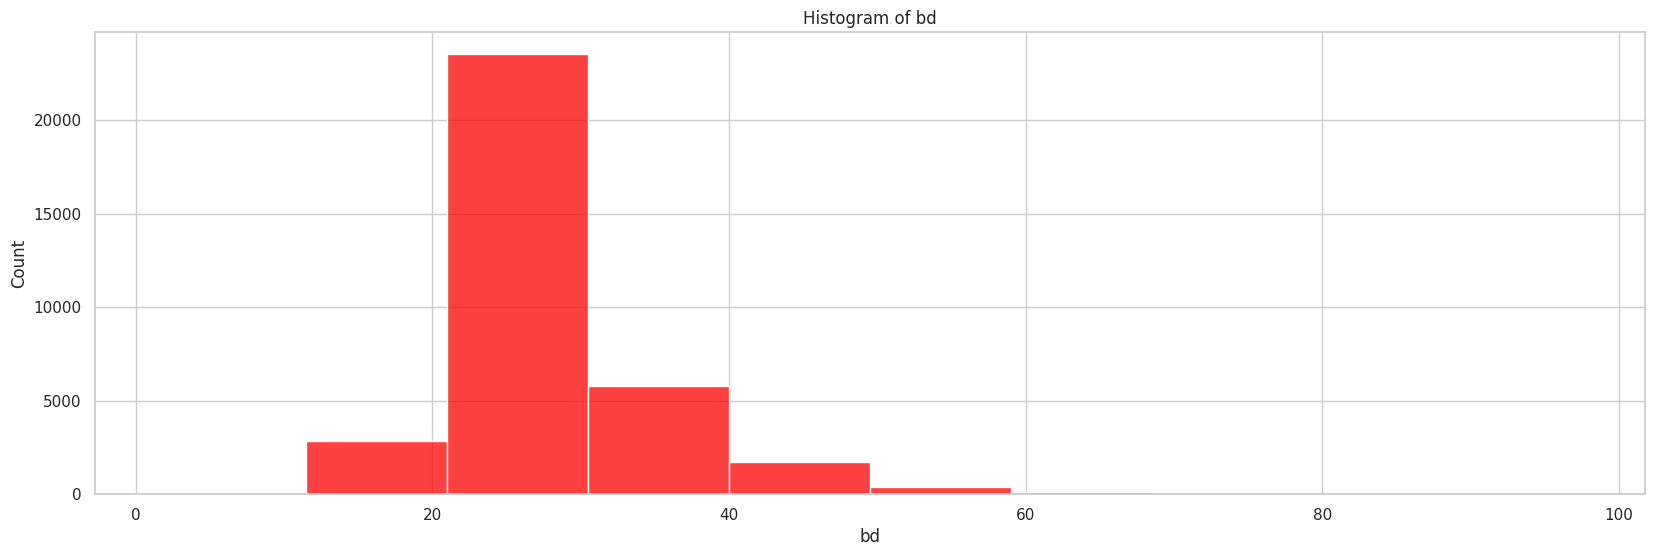

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming members_df is your DataFrame and 'bd' is a column in it
sns.set(style="whitegrid")  # Optional: Set the style if needed

# Create the histogram with red color
sns.histplot(x='bd', data=members_df, bins=10, color='red')

# Set the title of the figure
plt.title('Histogram of bd')

# Show the plot
plt.show()


Аналогично с полом

In [45]:
train_gender =  members_df[members_df['gender'] != 0].copy()
y_train_gender  = train_gender['gender']
train_gender.drop(['msno','gender'],axis = 1 , inplace = True )
test_gender =  members_df[members_df['gender'] == 0].copy()
y_test_gender  = test_gender['gender']
test_gender.drop(['msno' ,'gender'],axis = 1 , inplace = True )

In [46]:
model = CatBoostClassifier(verbose = 0 )
model.fit(train_gender.values, y_train_gender.values.ravel())
cv_score = cross_val_score(model, train_gender.values,y_train_gender.values.ravel(), cv=3 ,scoring='accuracy').mean()
cv_score

0.5258948136836681

In [47]:
predictions = model.predict(test_gender.values)

In [48]:
members_df['gender'].value_counts()

0    19902
2     7405
1     7096
Name: gender, dtype: int64

In [49]:
gender_nulls_indexes = members_df[members_df['gender'] == 0].index
j = 0
for i in gender_nulls_indexes :
    members_df.loc[i , 'gender'] = predictions[j]
    j += 1

In [50]:
members_df['gender'].value_counts()

1    17707
2    16696
Name: gender, dtype: int64

In [51]:
members_df.head()

,msno,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,38,1,7,2011,8,20,2017,9,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,25,1,7,2015,6,28,2017,6,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,24,1,4,2016,4,11,2017,7,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,33,1,9,2015,9,6,2015,9,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,25,1,4,2017,1,26,2017,6,13


# Создаем объединенный датасет и готовим данные

In [52]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df['target'].values
test_IDs = test_df['msno'].copy()
all_data = pd.concat((train_df.drop('target',axis =1), test_df)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9934208, 6)


In [53]:
all_data.drop('id', axis =1 , inplace = True)

In [54]:
all_data = all_data.merge(members_df, on='msno', how='left')

all_data = all_data.merge(songs_df, on = 'song_id', how = 'left')

In [55]:
del [[members_df,songs_df]]
import gc
gc.collect()

255

Заменяем оставшиеся пропуски

In [56]:
for i in range(0,8):
    all_data[i] = all_data[i].fillna(0)

In [57]:
all_data[0].value_counts()

465     5062629
458     1651779
921      610930
1609     450948
444      378968
         ...   
87            1
2015          1
1579          1
751           1
303           1
Name: 0, Length: 166, dtype: int64

In [58]:
for i in range(0,8):
    all_data[i] = all_data[i].astype('category').cat.codes

In [59]:
all_data[0].value_counts()

119    5062629
118    1651779
155     610930
47      450948
116     378968
        ...   
149          1
65           1
44           1
138          1
102          1
Name: 0, Length: 166, dtype: int64

In [60]:
nulls_cols = all_data.isnull().sum()
nulls_cols = nulls_cols[nulls_cols != 0]
list(nulls_cols.keys())

['song_length', 'artist_name', 'composer', 'lyricist', 'language']

In [61]:
for col in list(nulls_cols.keys()):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [62]:
all_data.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
city                  0
bd                    0
gender                0
registered_via        0
reg_year              0
reg_month             0
reg_day               0
exp_year              0
exp_month             0
exp_day               0
song_length           0
artist_name           0
composer              0
lyricist              0
language              0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
dtype: int64

Обработка категориальных данных и скалирование

In [63]:
all_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,reg_year,...,lyricist,language,0,1,2,3,4,5,6,7
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,30,2,7,2012,...,,52.0,106,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,1,9,2011,...,,52.0,35,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,1,9,2011,...,,52.0,35,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,13,24,1,9,2011,...,,-1.0,5,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,30,2,7,2012,...,,52.0,4,0,0,0,0,0,0,0


In [64]:
all_data[['composer']].nunique()

composer    86203
dtype: int64

In [65]:
categorical_col = ['city','gender','registered_via','language','artist_name','composer','lyricist']
for col in all_data.columns:
    if all_data[col].dtype in [bool ,object, 'category'] and len(all_data[col].unique()) <= 50:
        categorical_col.append(col)

In [66]:
categorical_col

['city',
 'gender',
 'registered_via',
 'language',
 'artist_name',
 'composer',
 'lyricist',
 'source_system_tab',
 'source_screen_name',
 'source_type']

In [67]:
for col in categorical_col:
    # Ensure the column is not of float16 type
    if all_data[col].dtype == 'float16':
        all_data[col] = all_data[col].astype('float32')  # or 'float64'

    all_data[col] = all_data[col].astype('category').cat.codes


In [68]:
all_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,reg_year,...,lyricist,language,0,1,2,3,4,5,6,7
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,2,8,7,0,30,1,2,2012,...,0,8,106,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,4,9,5,11,24,0,3,2011,...,0,8,35,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,4,9,5,11,24,0,3,2011,...,0,8,35,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,4,9,5,11,24,0,3,2011,...,0,0,5,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,2,8,7,0,30,1,2,2012,...,0,8,4,0,0,0,0,0,0,0


In [69]:
all_data['msno'].value_counts()

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    7894
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    7318
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    7075
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    6706
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    5446
                                                ... 
U8+k0YmjY2aDIM7Wd9ejIF/XqZkoWbBlv+2booso86A=       1
0Yby35OBCWJyG0HOTIx003npPQ8mMY51ZI+Q6JulBqI=       1
YBw/FWdyTgpVStJFzPn0aVf3/dtQwxAiHmvAu3pxyoI=       1
g0cf2zdSgmLeBAHJZJZc85VD4l6f6xKkNegrh8VEAms=       1
q9mrx9lx8969hkkTf4h96PqKeeG0DTC5iMLuc/6VDSI=       1
Name: msno, Length: 34403, dtype: int64

In [70]:
print('in',all_data.columns.map(type))
all_data.columns = all_data.columns.astype(str)
print('out',all_data.columns.map(type))

in Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>],
      dtype='object')
out Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')


In [71]:
train_data = all_data[:ntrain].copy()
test_data = all_data[ntrain:]
train_data['target'] = y_train

train_data.shape , test_data.shape

((7377418, 29), (2556790, 28))

In [72]:
train_data['target'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float16

In [73]:

print(train_data['target'].dtype)


train_data['target'] = train_data['target'].astype(int)


train_data['target'] = train_data['target'].astype("category").cat.codes


float16


In [74]:
train_data['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int8

In [75]:
X_train = train_data.drop(['target','msno','song_id'], axis = 1)
test_data = test_data.drop(['msno','song_id'],axis = 1)
y_train = train_data.target
X_train.shape , y_train.shape

((7377418, 26), (7377418,))

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(test_data)

In [95]:
X_train = X_train_scaled
test_data = test_data_scaled

In [104]:
import lightgbm as lgb

train_set = lgb.Dataset(X_train , y_train)
val_set = lgb.Dataset(X_val, y_val)
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 216,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 510,
        'max_depth': 20,
        'num_rounds': 500,
        'metric' : 'ndcg@20',
    }

model_f1 = lgb.train(params, train_set=train_set,  valid_sets=train_set)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [105]:
predictions = model_f1.predict(pd.DataFrame(test_data).values)
sub = pd.DataFrame()
sub['id'] = test_df['id']
sub['target'] = predictions
sub.to_csv('submission.csv',index=False)
sub.head()

,id,target
0,0,0.569649
1,1,0.657603
2,2,0.084143
3,3,0.116330
4,4,0.083474
